## Background

Event Study Model

The equation to estimate the effect of the Truck Parking Accident (TPA) on the creation of truck stops is specified as follows:

$$
\Delta \text{Num\_Truck\_Stop}_{tj} = \sum_{i=-6}^{6} \beta_{ij} \text{TPA}_{ij} + \gamma X_{tj} + \epsilon_{tj}
$$

Where:

$\Delta\text{Num\_Truck\_Stop}_{tj}$ is the change in truck stop capacity in year $t$ for category $j$.

$\beta_i$ are the coefficients for the event dummies ($\text{TPA}_{i,j}$), where $i$ represents the relative year to the Truck Parking Accident ($i = -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6$).

$\text{TPA}_{i,j}$ is the event dummy indicating the presence of a Truck Parking Accident in relative year $i$ for category $j$. Specifically, when $i = 0$, this corresponds to the year in which the Truck Parking Accident occurs.

$\gamma$ represents the coefficients for the control variables ($X_{tj}$).

$X_{tj}$ are the control variables in year $t$ for category $j$.

$\epsilon_{tj}$ is the error term for year $t$ and category $j$.

$j$ indicates a specific category used to isolate subsets of the data.

To analyze the impact of the Truck Parking Accident across different zoning categories, I will estimate to each corresponding category:

Traditional: This category evaluates the effects in conventional settings with typical zoning regulations.

Exclusion: This category examines the impacts in areas where truck stops are limited or restricted by zoning laws.

Reform: This category focuses on regions undergoing policy or structural reforms related to truck parking.

Wild Wild Texas: This category investigates the unique circumstances and effects in Texas, a state known for its lack of zoning regulation.

To start, we will run a basic model without the categories 
$$
\Delta\text{Num\_Truck\_Stop}_{t} = \sum_{i=-6}^{6} \beta_{i} \text{TPA}_{i} + \gamma X_{t} + \epsilon_{t}
$$

The first step is to first figure out how to define what consittutes a note worthy truck parking accident. 

In [134]:
import pandas as pd

result_df = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Initial Proposal\result_df.csv')
county_change_df = pd.read_csv(r'C:\Users\clint\Desktop\Research-Paper-Trucks\Data\entry_exit\COUNTY_change.csv')
result_df

,CRASH_ID,REPORT_STATE,REPORT_DATE,REPORT_SEQ_NO,LOCATION,CITY_CODE,CITY,STATE,COUNTY_CODE,VEHICLES_IN_ACCIDENT,FATALITIES,INJURIES,CRASH_EVENT_SEQ_ID_DESC
0,4860792,CA,20241017,1,34.441682 / -118.568696,NaN,SANTA CLARITA,CA,37.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
1,4860781,CA,20241117,1,ANNADALE AV / 26 FT W J ST,NaN,SANGER,CA,19.0,2.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
2,4860550,ID,20241206,2,DIVIDE CREEK,NaN,MERIDIAN,ID,1.0,2.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
3,4860541,ID,20241122,1,BEST BUSINESS AVE,NaN,KUNA,ID,1.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
4,4860302,IL,20241205,2,S WEST ST,NaN,Olney Twp,IL,159.0,4.0,0,0,2:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46313,16220,SD,19970923,1,6TH ST,NaN,SIOUX FALLS,SD,99.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46314,16111,SD,20000716,1,I-90,NaN,RURAL,SD,93.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46315,16017,SD,20010203,1,I-29,NaN,RURAL,SD,99.0,7.0,0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46316,15968,SD,19990120,1,I-90,NaN,RURAL,SD,99.0,2.0,0,0,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE


We observe our summary statistics

In [135]:
summary_statistics = result_df[['VEHICLES_IN_ACCIDENT', 'FATALITIES', 'INJURIES']].describe()

# Calculate the value corresponding to z-score = 2
z_score_2_values = summary_statistics.loc['mean'] + 2 * summary_statistics.loc['std']

# Display the summary statistics and z-score = 2 values
summary_statistics.loc['z_score_2'] = z_score_2_values
summary_statistics

,VEHICLES_IN_ACCIDENT,FATALITIES,INJURIES
count,46230.000000,46318.000000,46318.000000
mean,2.302336,0.046073,0.532925
std,1.030429,0.265857,1.019164
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000
max,58.000000,20.000000,35.000000
z_score_2,4.363195,0.577787,2.571253


A significant truck parking accident can be defined in various ways. However, I believe a Z-score greater than 2 is sufficient for our purposes, as it is a commonly accepted standard. To help visualize this, please refer to the following plots.

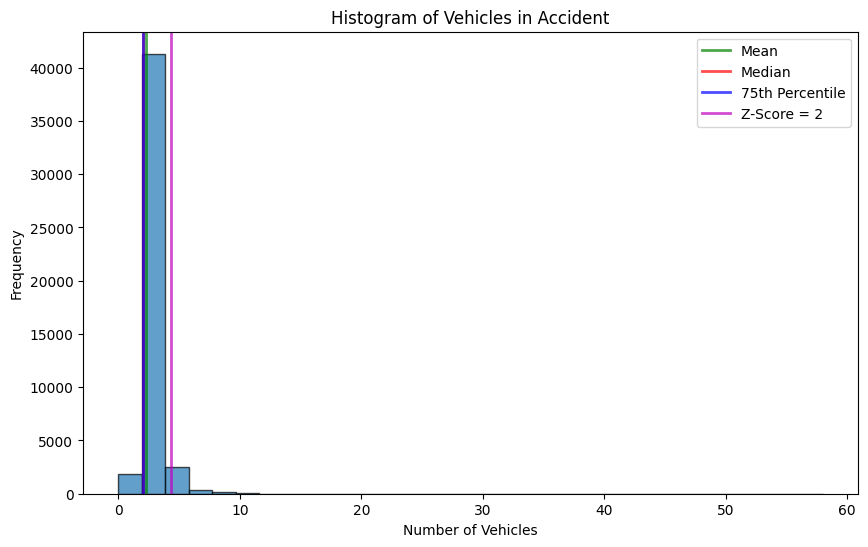

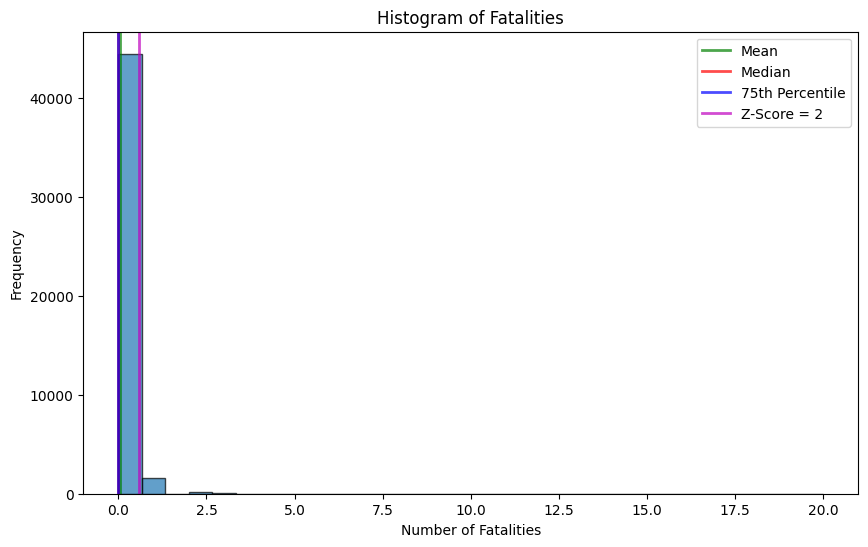

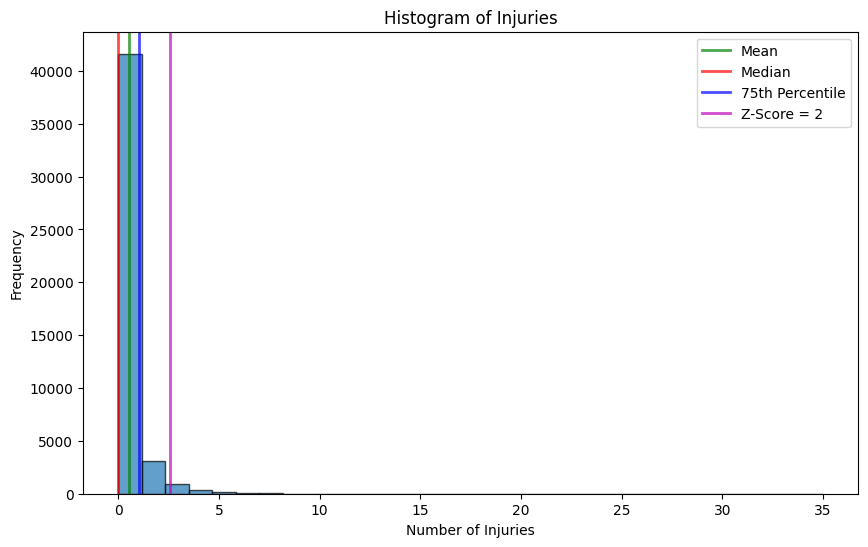

In [136]:
import matplotlib.pyplot as plt

# Plot histogram for VEHICLES_IN_ACCIDENT
plt.figure(figsize=(10, 6))
plt.hist(result_df['VEHICLES_IN_ACCIDENT'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(summary_statistics.loc['mean', 'VEHICLES_IN_ACCIDENT'], color='g', linestyle='-', linewidth=2, label='Mean', alpha=0.7)
plt.axvline(result_df['VEHICLES_IN_ACCIDENT'].median(), color='r', linestyle='-', linewidth=2, label='Median', alpha=0.7)
plt.axvline(result_df['VEHICLES_IN_ACCIDENT'].quantile(0.75), color='b', linestyle='-', linewidth=2, label='75th Percentile', alpha=0.7)
plt.axvline(summary_statistics.loc['z_score_2', 'VEHICLES_IN_ACCIDENT'], color='m', linestyle='-', linewidth=2, label='Z-Score = 2', alpha=0.7)
plt.title('Histogram of Vehicles in Accident')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for FATALITIES
plt.figure(figsize=(10, 6))
plt.hist(result_df['FATALITIES'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(summary_statistics.loc['mean', 'FATALITIES'], color='g', linestyle='-', linewidth=2, label='Mean', alpha=0.7)
plt.axvline(result_df['FATALITIES'].median(), color='r', linestyle='-', linewidth=2, label='Median', alpha=0.7)
plt.axvline(result_df['FATALITIES'].quantile(0.75), color='b', linestyle='-', linewidth=2, label='75th Percentile', alpha=0.7)
plt.axvline(summary_statistics.loc['z_score_2', 'FATALITIES'], color='m', linestyle='-', linewidth=2, label='Z-Score = 2', alpha=0.7)
plt.title('Histogram of Fatalities')
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for INJURIES
plt.figure(figsize=(10, 6))
plt.hist(result_df['INJURIES'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(summary_statistics.loc['mean', 'INJURIES'], color='g', linestyle='-', linewidth=2, label='Mean', alpha=0.7)
plt.axvline(result_df['INJURIES'].median(), color='r', linestyle='-', linewidth=2, label='Median', alpha=0.7)
plt.axvline(result_df['INJURIES'].quantile(0.75), color='b', linestyle='-', linewidth=2, label='75th Percentile', alpha=0.7)
plt.axvline(summary_statistics.loc['z_score_2', 'INJURIES'], color='m', linestyle='-', linewidth=2, label='Z-Score = 2', alpha=0.7)
plt.title('Histogram of Injuries')
plt.xlabel('Number of Injuries')
plt.ylabel('Frequency')
plt.legend()
plt.show()

We now filter by z score>2. Our resulting dataframe is as follows. 

In [137]:
# Filter the dataframe for VEHICLES_IN_ACCIDENT
vehicles_filtered_df = result_df[result_df['VEHICLES_IN_ACCIDENT'] > z_score_2_values['VEHICLES_IN_ACCIDENT']]

# Filter the dataframe for FATALITIES
fatalities_filtered_df = result_df[result_df['FATALITIES'] > z_score_2_values['FATALITIES']]

# Filter the dataframe for INJURIES
injuries_filtered_df = result_df[result_df['INJURIES'] > z_score_2_values['INJURIES']]

vehicles_filtered_df,fatalities_filtered_df,injuries_filtered_df

(       CRASH_ID REPORT_STATE  REPORT_DATE  REPORT_SEQ_NO  \
 22      4859234           FL     20241205              1   
 87      4855020           MD     20240917              3   
 88      4855019           MD     20240917              2   
 89      4855018           MD     20240917              1   
 144     4851811           IL     20241108              1   
 ...         ...          ...          ...            ...   
 46287     20298           TN     19970607              1   
 46294     19182           TN     19961020              1   
 46295     18744           TN     19940824              1   
 46315     16017           SD     20010203              1   
 46317     15953           SD     20010203              1   
 
                           LOCATION  CITY_CODE            CITY STATE  \
 22     STATE ROAD 52 (CLINTON AVE)        NaN  UNINCORPORATED    FL   
 87        MD231 HALLOWING POINT RD        NaN             NaN    MD   
 88        MD231 HALLOWING POINT RD        NaN    

For simplicity we will start with fatalities as our initial truck parking accident of interest. 

## Adjusted Model for Truck Parking Analysis

Our dataset cannot accommodate the initial model because we only observe changes in truck parking during the years 2007, 2008, 2015, and 2016. To address this limitation, we adjust the model as follows:

$$
\Delta\text{Num\_Truck\_Stop}_{t=2006-2016} = \sum_{i=2}^{0} \beta_{t-i} \text{TPA}_{t-i}\cdot \text{Severity}_{t-i} + \gamma X_t + \epsilon_t
$$

### Model Explanation
- $ \text{TPA}_{t-i} $: A lagged dummy variable indicating a severe truck parking accident.
- Severity is our measure of severity of the accident which can take the form of 'VEHICLES_IN_ACCIDENT', 'INJURIES' and fatalities
- $ i $: Represents time units relative to the 2006-2016 period.
- $ X_t $: Includes control variables.
- $ \epsilon_t $: Error term.

This adjustment allows us to analyze the effects of severe truck parking accidents within the available time frame.


In [138]:
county_change_df

# county_change_df['change_2007+2008'] = county_change_df[['change_2007', 'change_2008']].sum(axis=1)
# county_change_df['change_2015+2016'] = county_change_df[['change_2015', 'change_2016']].sum(axis=1)
county_change_df.drop(columns=['change_2007', 'change_2008', 'change_2015', 'change_2016'], inplace=True)
# county_change_df
fatalities_filtered_df
fatalities_filtered_df.drop(columns=['VEHICLES_IN_ACCIDENT', 'INJURIES'], inplace=True)
fatalities_filtered_df

C:\Users\clint\AppData\Local\Temp\ipykernel_15580\1229754232.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatalities_filtered_df.drop(columns=['VEHICLES_IN_ACCIDENT', 'INJURIES'], inplace=True)


,CRASH_ID,REPORT_STATE,REPORT_DATE,REPORT_SEQ_NO,LOCATION,CITY_CODE,CITY,STATE,COUNTY_CODE,FATALITIES,CRASH_EVENT_SEQ_ID_DESC
24,4859179,NY,20241205,3,Ref Marker:,NaN,NaN,NY,0.0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
87,4855020,MD,20240917,3,MD231 HALLOWING POINT RD,NaN,NaN,MD,9.0,1,4:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...
88,4855019,MD,20240917,2,MD231 HALLOWING POINT RD,NaN,NaN,MD,9.0,1,4:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...
89,4855018,MD,20240917,1,MD231 HALLOWING POINT RD,NaN,NaN,MD,9.0,1,4:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...
99,4854403,NC,20241127,1,1131,NaN,BAILEY,NC,195.0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...
46296,18433,TN,19950827,1,I-75S MM16,NaN,CHATTANOOGA,TN,65.0,2,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46299,17670,TN,19991023,1,I 40,0.0,OUTSIDE CITY LIMITS,TN,89.0,3,3:12:COLLISION INVOLVING PEDESTRIAN;2:14:COLLI...
46300,17655,TN,20000806,1,I 65 NB,0.0,OUTSIDE CITY LIMITS,TN,55.0,2,3:12:COLLISION INVOLVING PEDESTRIAN;2:14:COLLI...
46301,17569,TN,19990614,2,I 40,0.0,OUTSIDE CITY LIMITS,TN,145.0,2,2:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...


C:\Users\clint\AppData\Local\Temp\ipykernel_15580\57130334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatalities_filtered_df['REPORT_DATE'] = pd.to_datetime(fatalities_filtered_df['REPORT_DATE'], format='%Y%m%d')


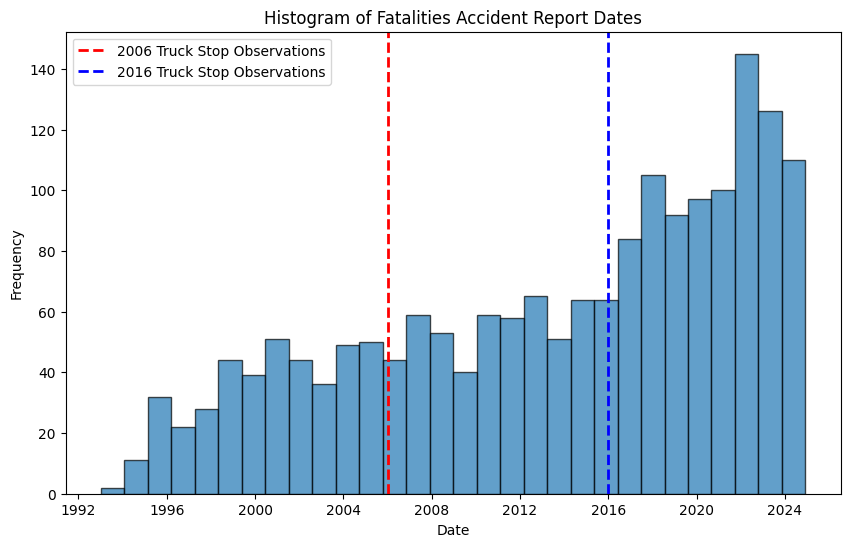

In [139]:
# Convert REPORT_DATE to datetime format
fatalities_filtered_df['REPORT_DATE'] = pd.to_datetime(fatalities_filtered_df['REPORT_DATE'], format='%Y%m%d')

# Plot histogram of REPORT_DATE
plt.figure(figsize=(10, 6))
plt.hist(fatalities_filtered_df['REPORT_DATE'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.axvline(pd.to_datetime('2006-01-01'), color='r', linestyle='--', linewidth=2, label='2006 Truck Stop Observations')
plt.axvline(pd.to_datetime('2016-01-01'), color='b', linestyle='--', linewidth=2, label='2016 Truck Stop Observations')
plt.title('Histogram of Fatalities Accident Report Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

red and blue line show our truck stop observations variable. The blue bars represent our accident observations.It takes apprximatley 4 years to build a truck stop. such that we will group our itime unit into 4 years

so our first time unit is 2002-2006, 1999-2001, 1993-1998

In [140]:
# Filter the dataframe to only keep data before 2006
fatalities_filtered_df = fatalities_filtered_df[fatalities_filtered_df['REPORT_DATE'] < '2006-01-01']
fatalities_filtered_df

,CRASH_ID,REPORT_STATE,REPORT_DATE,REPORT_SEQ_NO,LOCATION,CITY_CODE,CITY,STATE,COUNTY_CODE,FATALITIES,CRASH_EVENT_SEQ_ID_DESC
35811,1840144,NC,2005-06-06,1,1116,NaN,WARRENTON,NC,185.0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
36005,1812984,NM,2005-05-14,1,INTERSTATE 40 MP 218,NaN,NaN,NM,57.0,2,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
36338,1777910,NC,2005-12-15,1,WILCO TRAVEL STATION,NaN,SALISBURY,NC,159.0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
37404,1630108,NV,2005-12-09,1,R1 - LOSEE ROAD,NaN,LAS VEGAS,NV,3.0,1,2:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...
37457,1622812,NJ,2005-07-28,1,I-287,233.0,Mahwah Twp,NJ,3.0,1,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
...,...,...,...,...,...,...,...,...,...,...,...
46296,18433,TN,1995-08-27,1,I-75S MM16,NaN,CHATTANOOGA,TN,65.0,2,1:14:COLLISION INVOLVING PARKED MOTOR VEHICLE
46299,17670,TN,1999-10-23,1,I 40,0.0,OUTSIDE CITY LIMITS,TN,89.0,3,3:12:COLLISION INVOLVING PEDESTRIAN;2:14:COLLI...
46300,17655,TN,2000-08-06,1,I 65 NB,0.0,OUTSIDE CITY LIMITS,TN,55.0,2,3:12:COLLISION INVOLVING PEDESTRIAN;2:14:COLLI...
46301,17569,TN,1999-06-14,2,I 40,0.0,OUTSIDE CITY LIMITS,TN,145.0,2,2:14:COLLISION INVOLVING PARKED MOTOR VEHICLE;...


In [141]:
county_change_df

,Unnamed: 0,COUNTY,change_2006_2016
0,0,1001,0.0
1,1,1003,-2.0
2,2,1005,1.0
3,3,1007,1.0
4,4,1009,-1.0
...,...,...,...
2258,2258,56037,-1.0
2259,2259,56039,0.0
2260,2260,56041,0.0
2261,2261,56043,-1.0


In [142]:
fatalities_filtered_df = fatalities_filtered_df[['REPORT_DATE',  'FATALITIES','COUNTY_CODE']]
fatalities_filtered_df

,REPORT_DATE,FATALITIES,COUNTY_CODE
35811,2005-06-06,1,185.0
36005,2005-05-14,2,57.0
36338,2005-12-15,1,159.0
37404,2005-12-09,1,3.0
37457,2005-07-28,1,3.0
...,...,...,...
46296,1995-08-27,2,65.0
46299,1999-10-23,3,89.0
46300,2000-08-06,2,55.0
46301,1999-06-14,2,145.0


In [143]:
county_change_df

,Unnamed: 0,COUNTY,change_2006_2016
0,0,1001,0.0
1,1,1003,-2.0
2,2,1005,1.0
3,3,1007,1.0
4,4,1009,-1.0
...,...,...,...
2258,2258,56037,-1.0
2259,2259,56039,0.0
2260,2260,56041,0.0
2261,2261,56043,-1.0


In [144]:
# Remove the COUNTY column
county_change_df.drop(columns=['COUNTY'], inplace=True)

# Collapse change_2006_2016 into one by summing up the values
total_change_2006_2016 = county_change_df['change_2006_2016'].sum()

# Create a DataFrame to store the result
total_change_df = pd.DataFrame({'total_change_2006_2016': [total_change_2006_2016]})

# Display the DataFrame
total_change_df

,total_change_2006_2016
0,-130.0


In [145]:
import pandas as pd

# Assuming your data is in a CSV file, load it into a DataFrame
df = fatalities_filtered_df

# Convert REPORT_DATE to datetime
df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'])

# Extract the year from REPORT_DATE
df['YEAR'] = df['REPORT_DATE'].dt.year

# Define the conditions for the year ranges
conditions = [
    (df['YEAR'] >= 2002) & (df['YEAR'] <= 2006),
    (df['YEAR'] >= 1999) & (df['YEAR'] <= 2001),
    (df['YEAR'] >= 1993) & (df['YEAR'] <= 1998)
]

# Define the corresponding labels for the conditions
labels = ['2002-2006', '1999-2001', '1993-1998']

# Create a new column for the year range categories
df['YEAR_RANGE'] = pd.cut(df['YEAR'], bins=[1992, 1998, 2001, 2006], labels=labels)

# Group by the year range and sum the fatalities
result = df.groupby('YEAR_RANGE')['FATALITIES'].sum().reset_index()

result

C:\Users\clint\AppData\Local\Temp\ipykernel_15580\770915394.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['REPORT_DATE'] = pd.to_datetime(df['REPORT_DATE'])
C:\Users\clint\AppData\Local\Temp\ipykernel_15580\770915394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR'] = df['REPORT_DATE'].dt.year
C:\Users\clint\AppData\Local\Temp\ipykernel_15580\770915394.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,YEAR_RANGE,FATALITIES
0,2002-2006,146
1,1999-2001,152
2,1993-1998,215


In [146]:
result_transposed = result.transpose()
result_transposed

,0,1,2
YEAR_RANGE,2002-2006,1999-2001,1993-1998
FATALITIES,146,152,215


In [147]:
# Make the first row a header
result_transposed.columns = result_transposed.iloc[0]
result_transposed = result_transposed[1:]

# Reset the index
result_transposed.reset_index(drop=True, inplace=True)

result_transposed

YEAR_RANGE,2002-2006,1999-2001,1993-1998
0,146,152,215


In [148]:
total_change_df

,total_change_2006_2016
0,-130.0


In [149]:
result_combined = pd.concat([result_transposed, total_change_df], axis=1)
result_combined

,2002-2006,1999-2001,1993-1998,total_change_2006_2016
0,146,152,215,-130.0
